

<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Comparative Analysis of Supervised Machine Learning Algorithm for Predicting the Diabetes Disease </h1>

## Author:  Nathan Ayuba Zoakah

<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Introduction</h1>

### This is the scorce code for  a comparative study for predicting the diabetic disease. The aim of this study is to implement two supervised machine learning algorithms from scratch (NB and DT) and to also use scikit learn library to build models from two other algorithms (RF and SVM)  

<br>

###  Below is a diagram that illustrates the steps taken when predicting the diabetic disease from clinical data 

<div class = 'image'> <img style="float:center; border:5px solid grey; width:95%; margin: 20px; " align=center src = "method_image.png"> 
</div>

<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Importing Libraries </h1>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

# Other Evaluation Metric
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, matthews_corrcoef
from sklearn.metrics import precision_score, recall_score
import pickle


<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> About the Dataset </h1>

---
 Original Name | Comments| 
 ---|---|
 Pregnancies|Number of times pregnant|
 Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
 BloodPressure|Diastolic blood pressure (mm Hg)|
 SkinThickness|Triceps skin fold thickness (mm)|
 Insulin|2-Hour serum insulin (mu U/ml)|
 BMI|Body mass index (weight in kg/(height in m)^2)|
 DiabetesPedigreeFunction|Diabetes pedigree function|
 Age|Age (years)|




<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Loading Dataset </h1>

In [13]:
data = pd.read_csv("diabetes_clean.csv")

data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.tail()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Exploratory Data Analysis (EDA) </h1>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


0    500
1    268
Name: diabetes, dtype: int64


Text(0.5, 1.0, 'Distribution in target variable')

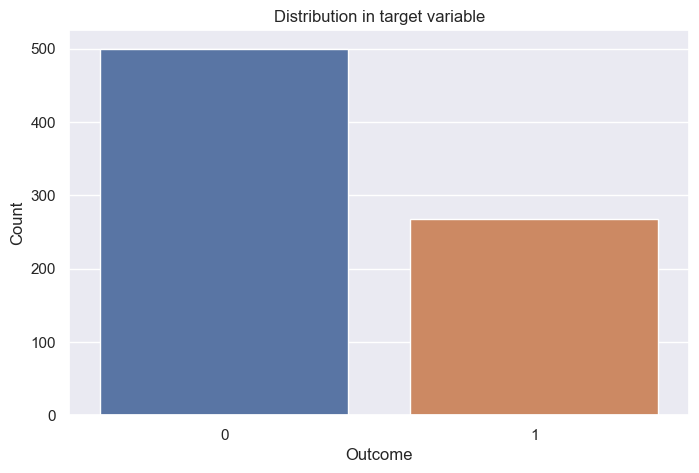

In [6]:
print(data['diabetes'].value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = data['diabetes'])
plt.xlabel('Outcome', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution in target variable', size = 12)

#### Age and Glucose verse Target Variable

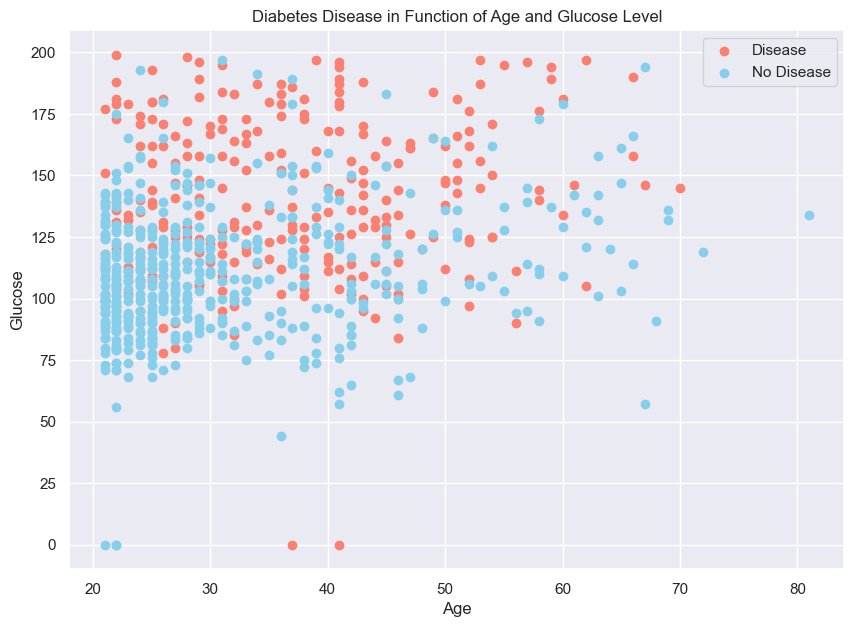

In [49]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(data.age[data.diabetes==1],
            data.glucose[data.diabetes==1],
            c = "salmon")

# Some Negative Examples
plt.scatter(data.age[data.diabetes == 0],
            data.glucose[data.diabetes == 0],
            c = "skyblue")

# Add some other helpful information
plt.title("Diabetes Disease in Function of Age and Glucose Level")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(["Disease", "No Disease"])

plt.show()

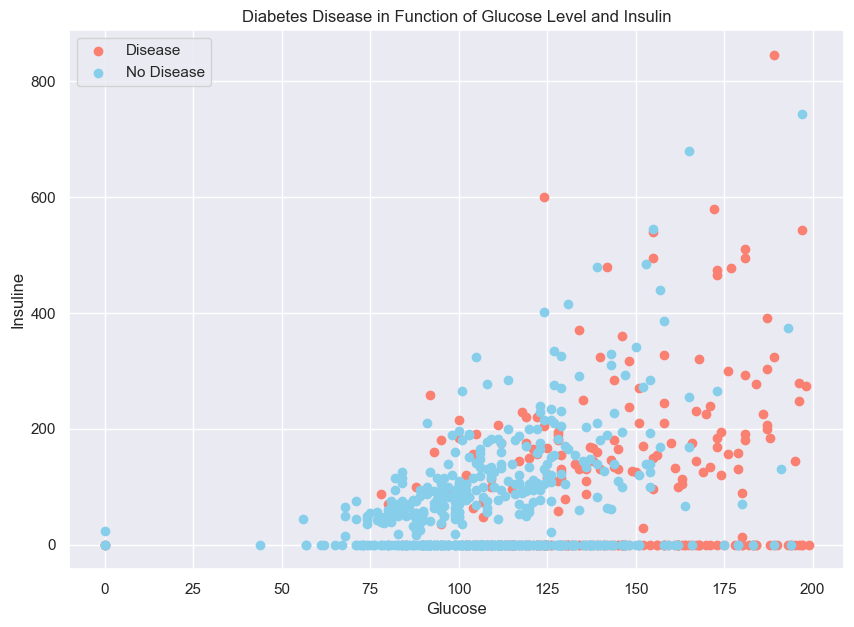

In [50]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(data.glucose[data.diabetes==1],
            data.insulin[data.diabetes==1],
            c = "salmon")

# Some Negative Examples
plt.scatter(data.glucose[data.diabetes == 0],
            data.insulin[data.diabetes == 0],
            c = "skyblue")

# Add some other helpful information
plt.title("Diabetes Disease in Function of Glucose Level and Insulin")
plt.xlabel("Glucose")
plt.ylabel("Insuline")
plt.legend(["Disease", "No Disease"])

plt.show()

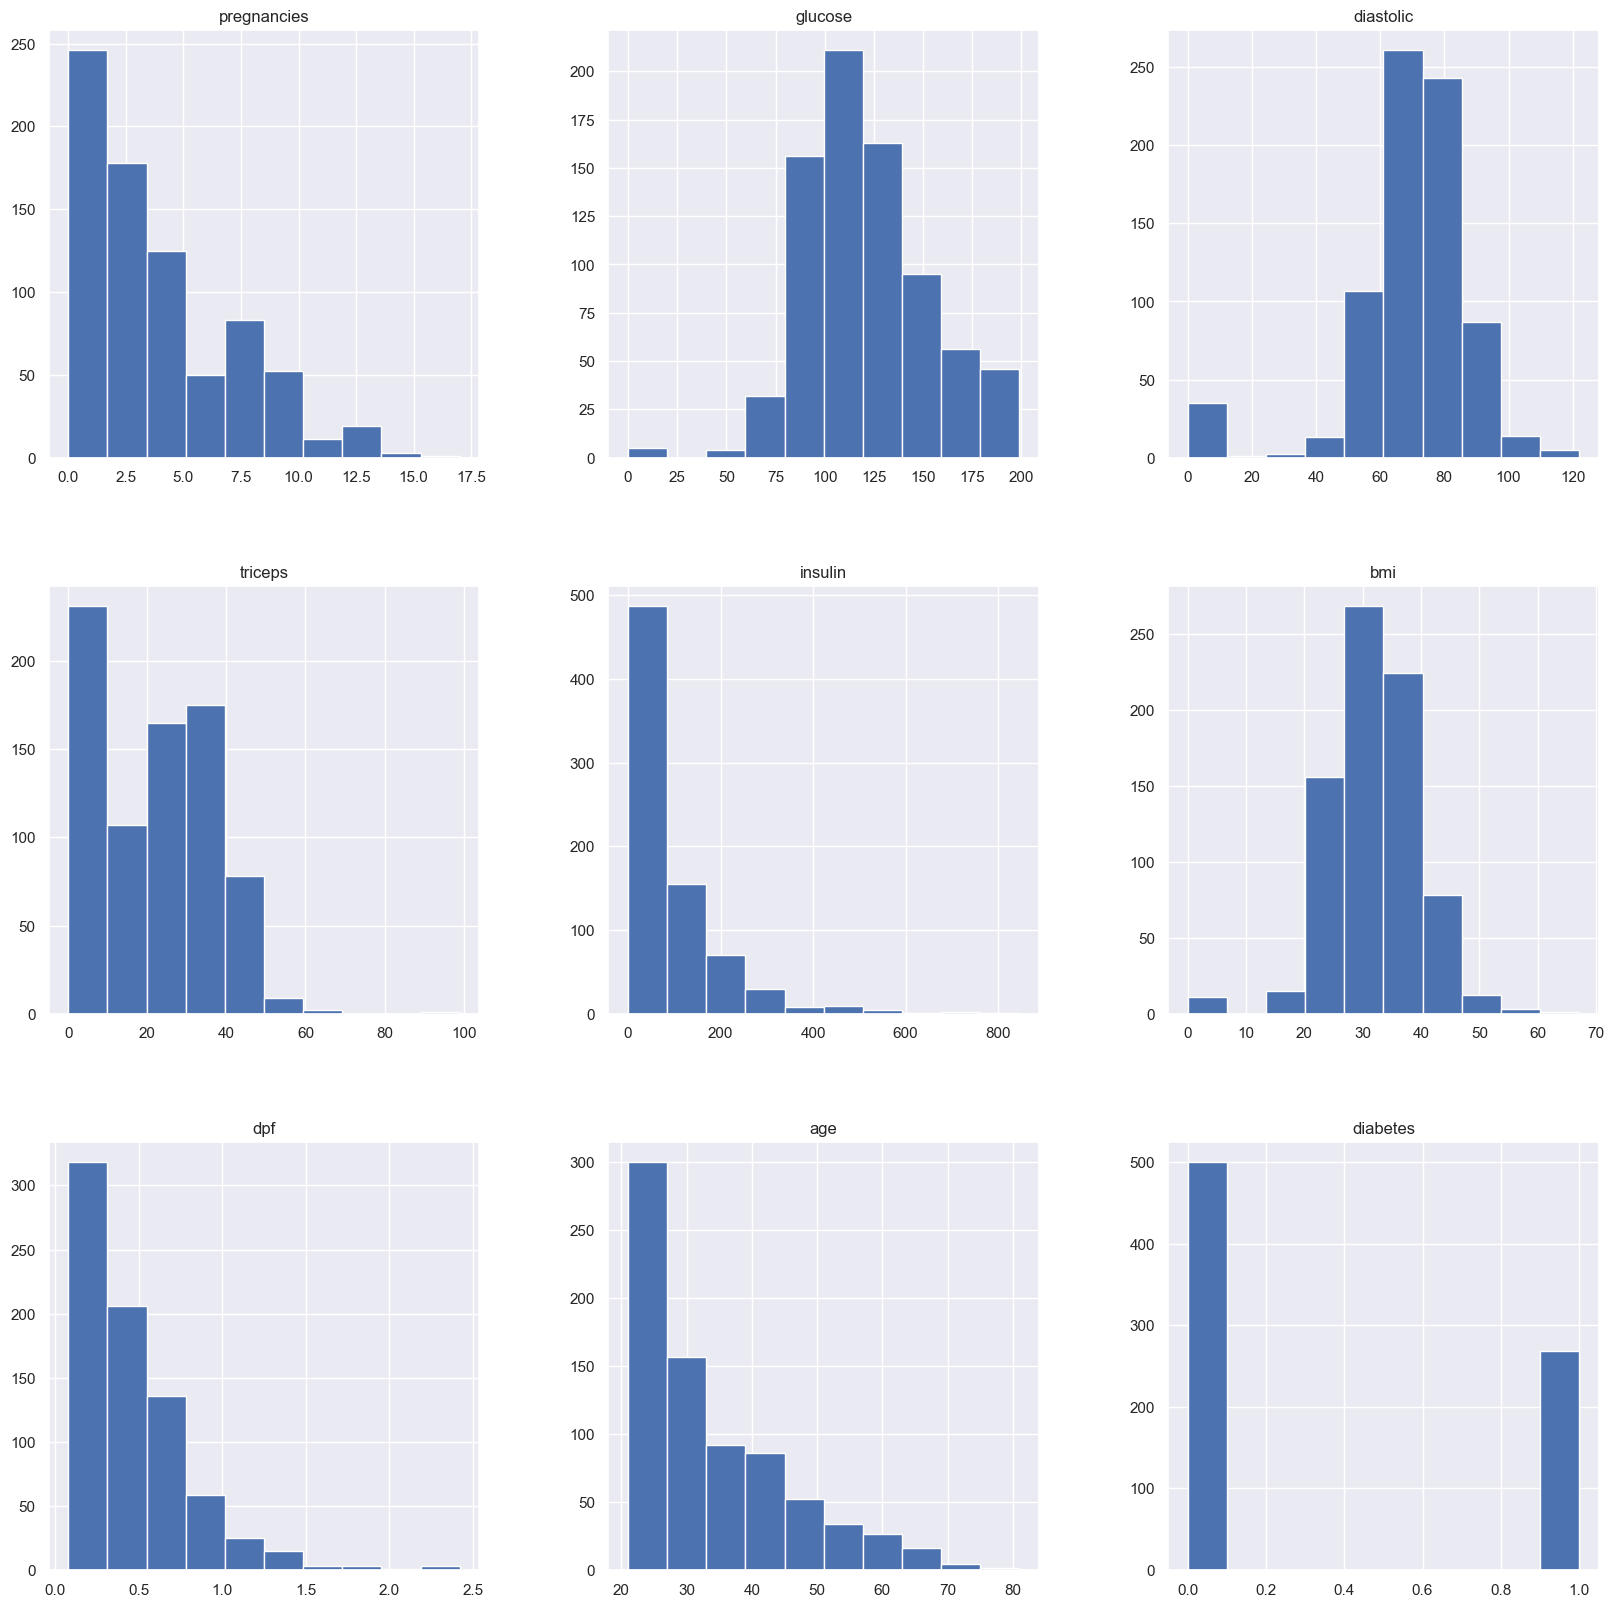

In [51]:
p = data.hist(figsize = (20,20))

<AxesSubplot:>

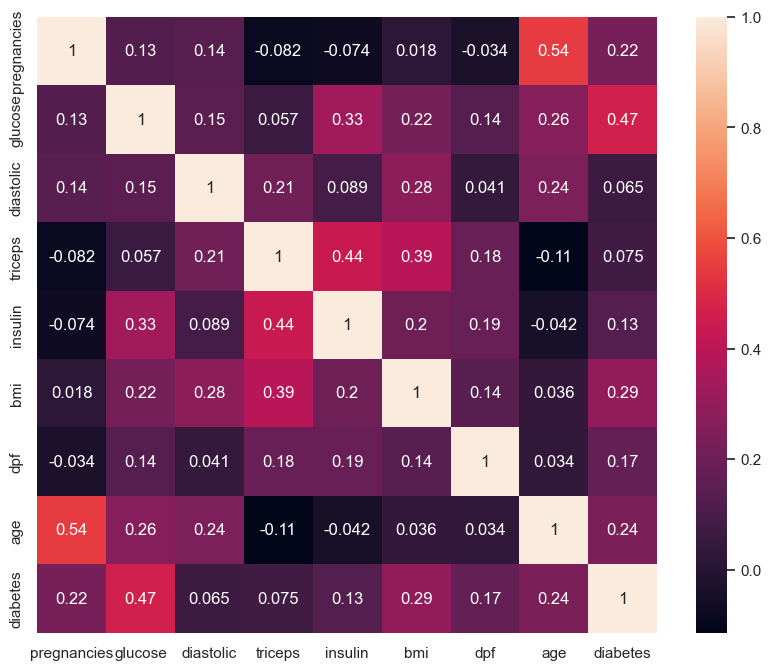

In [52]:
cor = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor, annot = True)

<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Data Preprocessing Techniques </h1>

In [7]:
# Divide data into features and target varibles
def divide_data(data):
    x = data.iloc[:,:-1]
    y = data.iloc[:, -1]
    print(x.shape, y.shape)
    return x,y

In [8]:
x, y = divide_data(data)

(768, 8) (768,)


### Replace missing data

In [14]:
# Create Method for Convert and Replace missing Data

def handle_missing_data(data):
    data_copy = data.copy(deep = True)
    data_copy[['glucose','diastolic','triceps','insulin','bmi']] = data_copy[['glucose','diastolic','triceps','insulin','bmi']].replace(0,np.NaN)

    ## showing the count of Nans
    print(data_copy.isnull().sum())
    
    # print missing  data graph
   # p=msno.bar(data_copy)
    
    # replace missing data with mean
    data_copy['glucose'].fillna(data_copy['glucose'].mean(), inplace = True)
    data_copy['diastolic'].fillna(data_copy['diastolic'].mean(), inplace = True)
    data_copy['triceps'].fillna(data_copy['triceps'].mean(), inplace = True)
    data_copy['insulin'].fillna(data_copy['insulin'].mean(), inplace = True)
    data_copy['bmi'].fillna(data_copy['bmi'].mean(), inplace = True)
    
    #print replaced data graph
    p=msno.bar(data_copy)
    
    return data_copy

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64


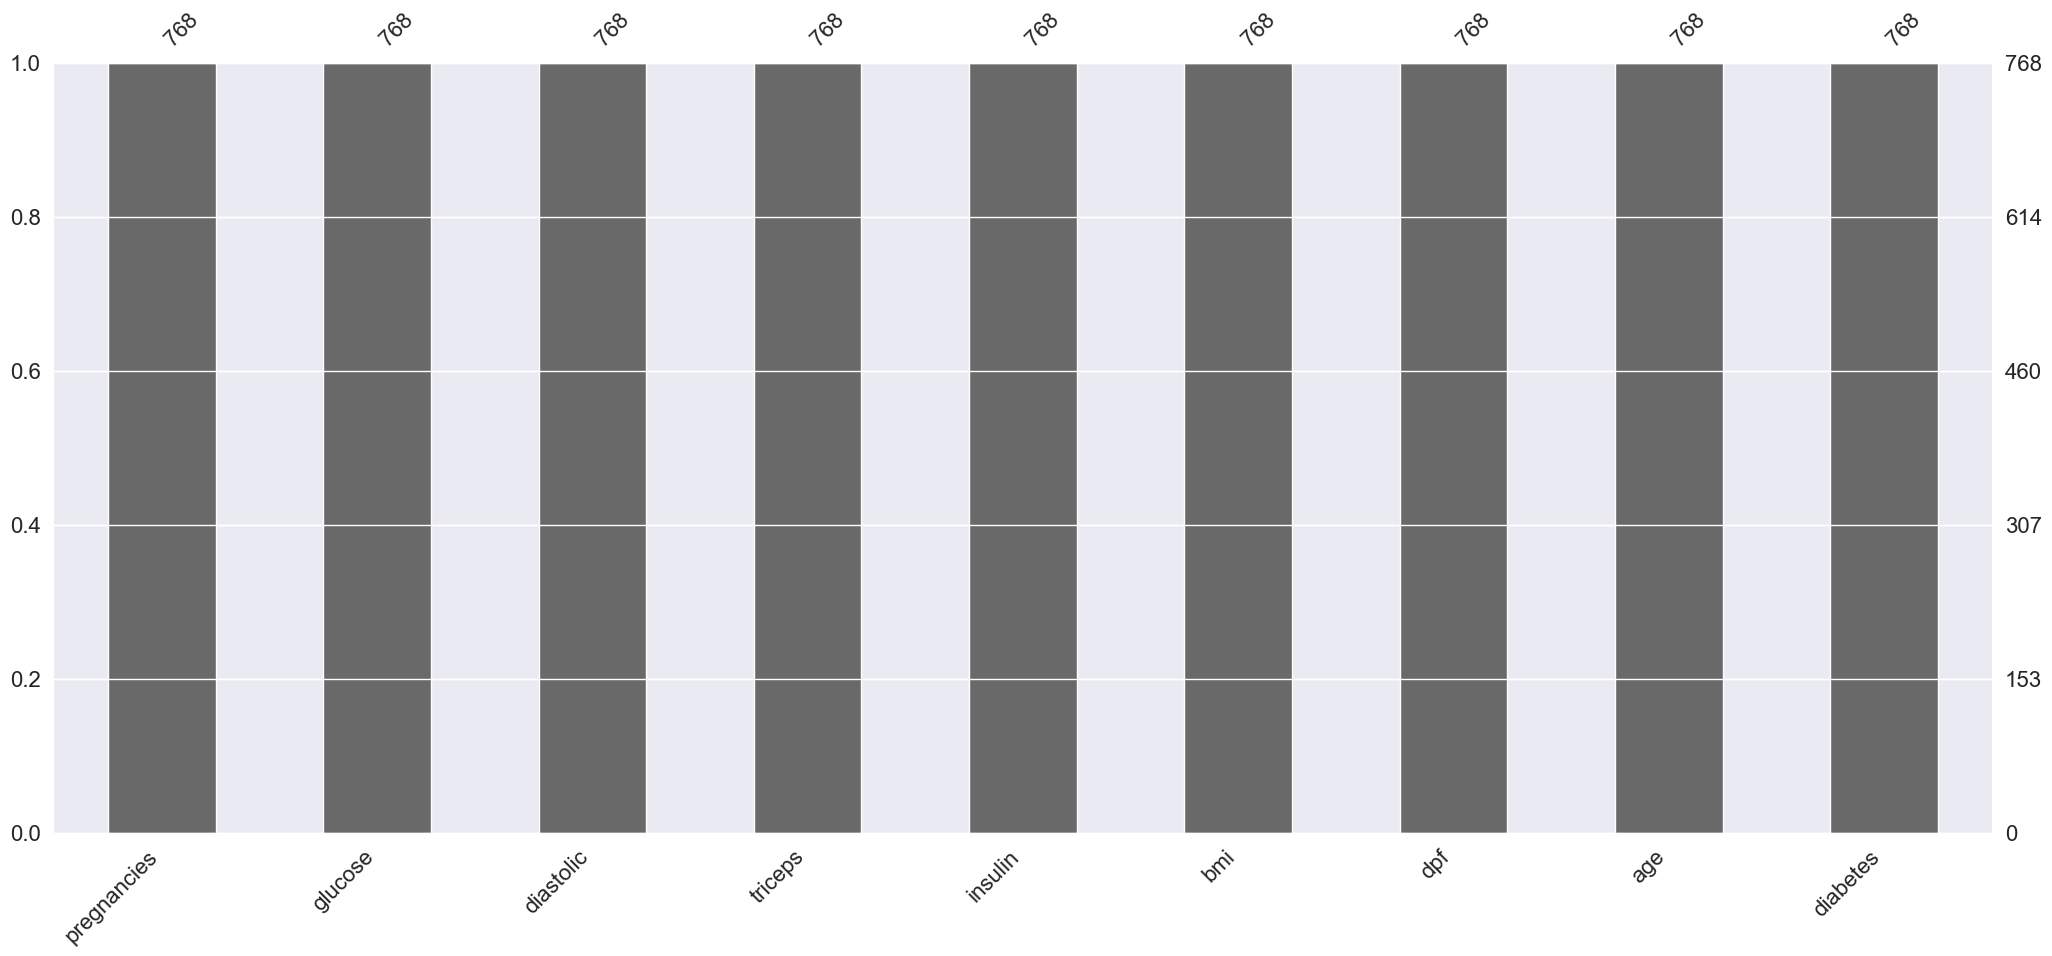

In [15]:
data_copy = handle_missing_data(data)

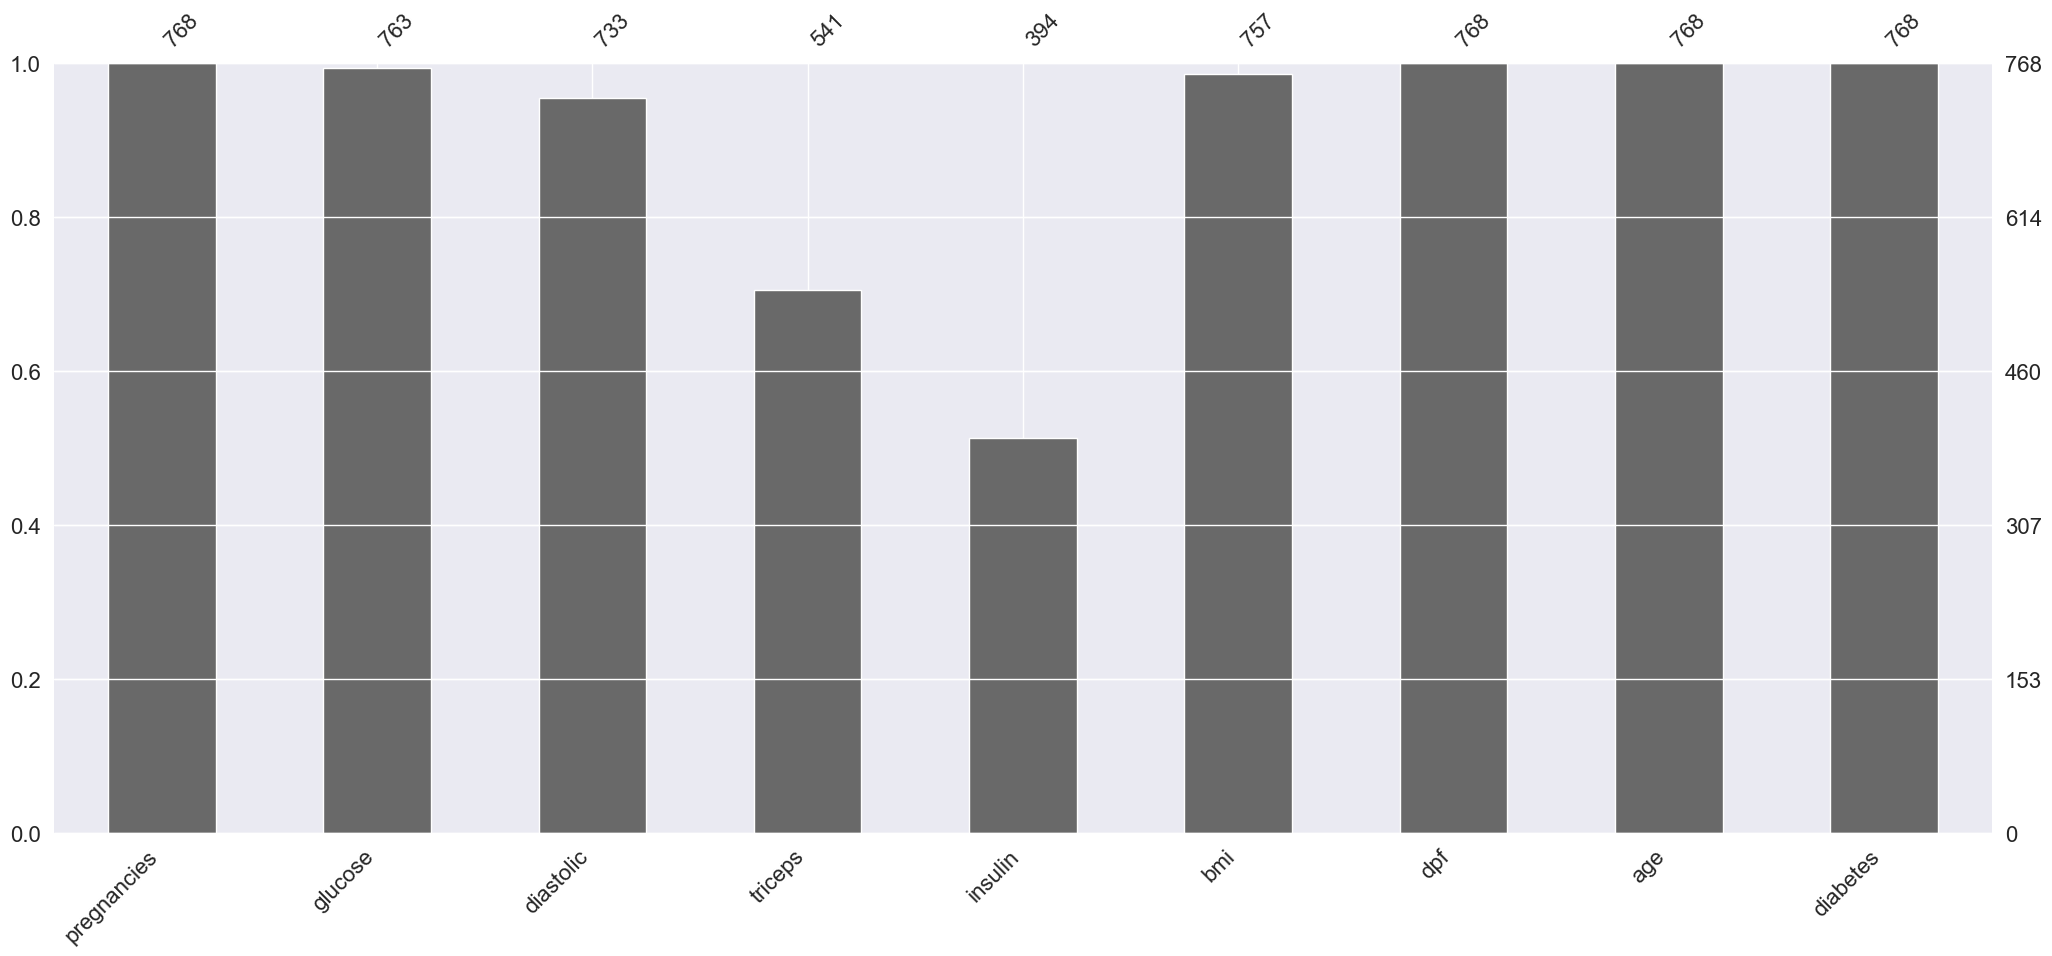

In [4]:
## null count analysis
import missingno as msno
p=msno.bar(data_copy)

In [16]:
data_copy.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [17]:
data_copy.tail()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1
767,1,93.0,70.0,31.00000,155.548223,30.4,0.315,23,0


#### Export data After replacing missing value with mean

In [18]:
data_export = data_copy

In [19]:
x, y = divide_data(data_copy)

(768, 8) (768,)


In [120]:
# resampling dat
over = RandomOverSampler()
x, y = over.fit_resample(x, y)

In [12]:
data_export = x

In [13]:
data_export["diabetes"] = y

In [15]:
data_export.to_csv("diabetes_preprocessed_without_scalingButBalanced.csv")

### Scaling of data

In [215]:
col = x.columns
std = StandardScaler()
x = std.fit_transform(x)
x = pd.DataFrame(data = x, columns = col)
x.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [20]:
# Method for scaling data

def scaling_data(data):
    
    """
    Returns scaled features and the target variable
    """
    x = data.iloc[:,:-1]
    y = data.iloc[:, -1]
    
    col = x.columns
    std = StandardScaler()
    x = std.fit_transform(x)
    x = pd.DataFrame(data = x, columns = col)
    
    
    return x,y


In [21]:
x, y = scaling_data(data_copy)

### Class Balancing

In [22]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)

1    500
0    500
Name: diabetes, dtype: int64


Text(0.5, 1.0, 'After Balancing The Class')

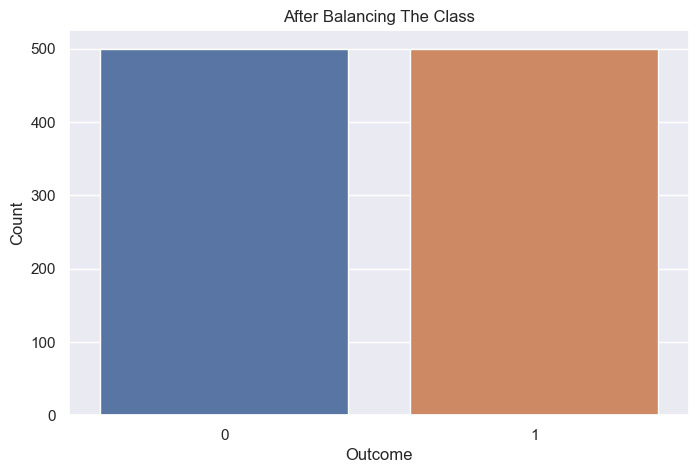

In [62]:
print(y.value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = y)
plt.xlabel('Outcome', size = 12)
plt.ylabel('Count', size = 12)
plt.title('After Balancing The Class', size = 12)

### Exporting Preprocessed Data (Missing Data Replacement and Class Balancing)

In [23]:
data_export = x

In [24]:
data_export["diabetes"] = y

In [25]:
data_export.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


In [31]:
data_export.to_csv("diabetes_preprocessed_withScaling2.csv")

### Exporting Preprocessed Data (Missing Data Replacement, Scaling and Class Balancing)

In [283]:
# Convert numpy to pandas
data_export = pd.DataFrame(x, columns = ['pregnancies','glucose','diastolic','triceps','insulin','bmi','dpf', 'age'])

In [284]:
data_target= pd.DataFrame(y, columns = ['diabetes'])

In [285]:
data_export.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [286]:
data_export["diabetes"] = y

In [287]:
data_export.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [ ]:
#data_export = data_export.drop("diabete", axis=1)

In [288]:
data_export.to_csv("diabetes_preprocessed_bestNBandSVM.csv")

#### Exploratory Data Analysis of Preprocessed Data

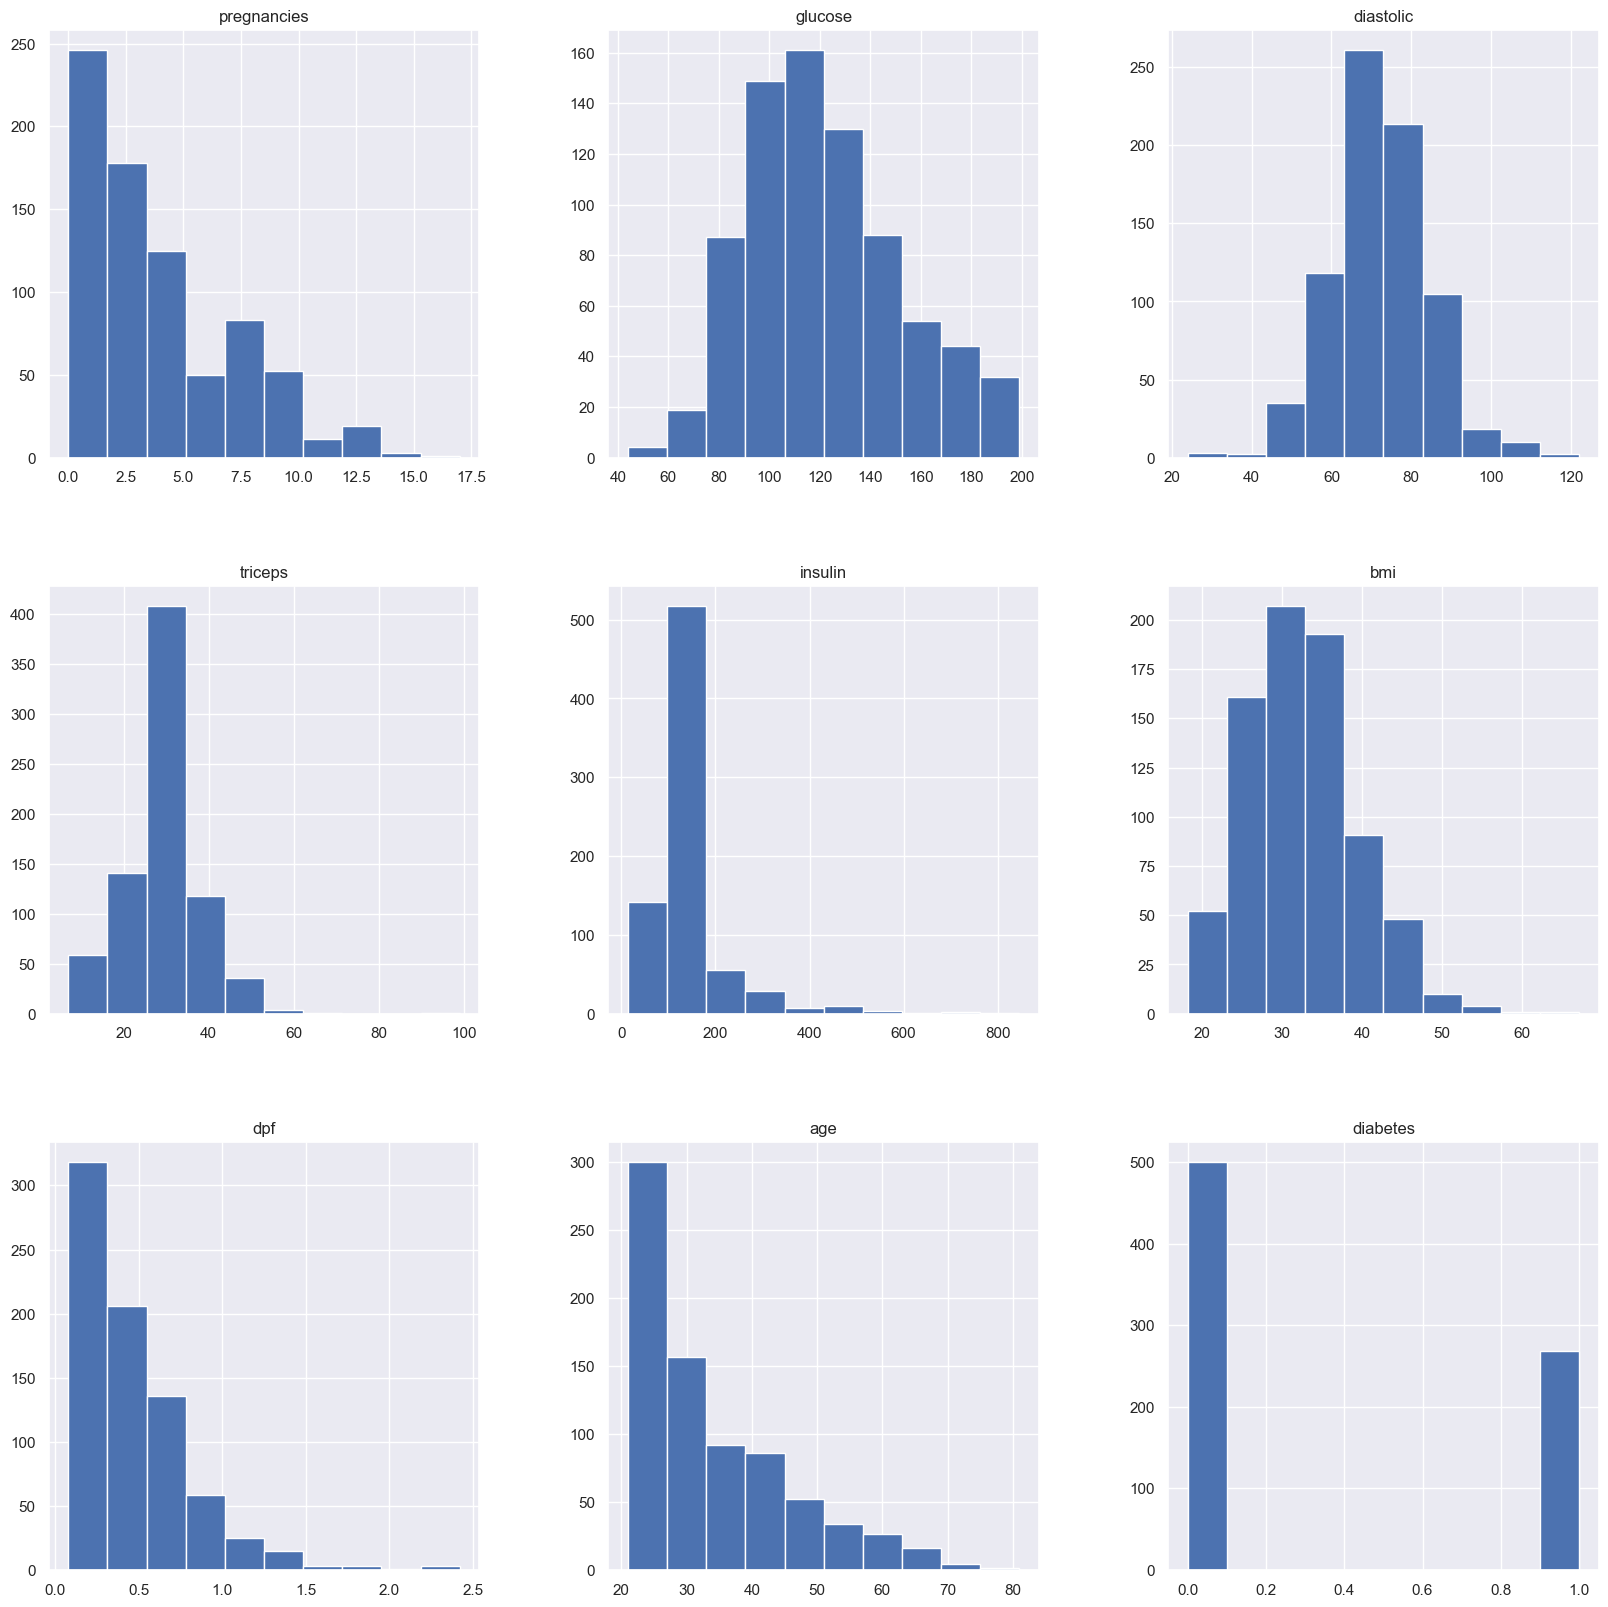

In [27]:
p2 = data_copy.hist(figsize = (20,20))

<AxesSubplot:>

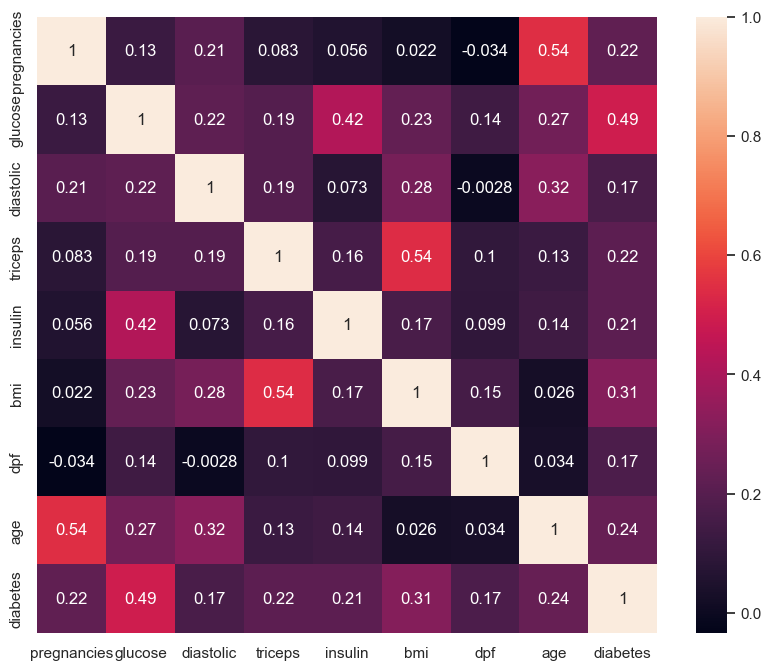

In [28]:
cor = data_copy.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor, annot = True)

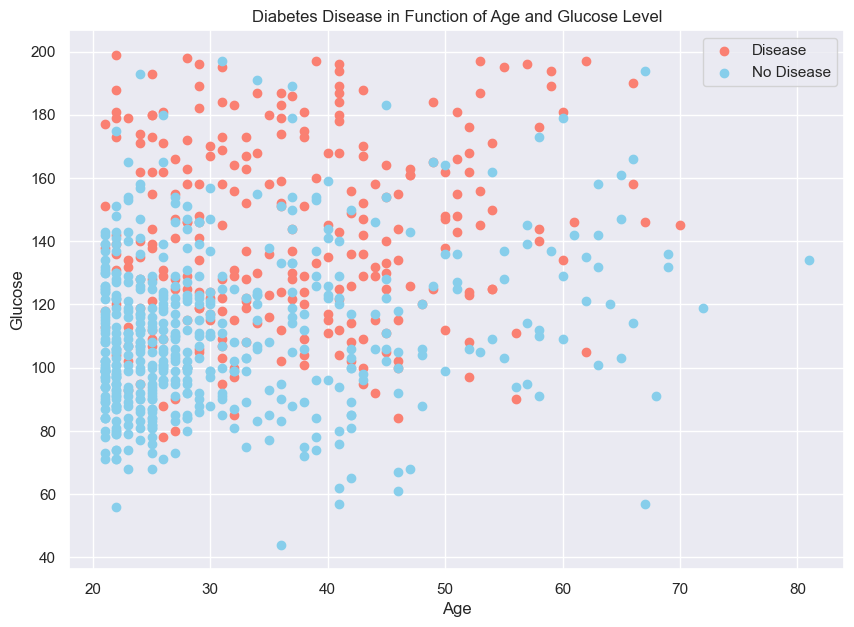

In [29]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(data_copy.age[data_copy.diabetes==1],
            data_copy.glucose[data_copy.diabetes==1],
            c = "salmon")

# Some Negative Examples
plt.scatter(data_copy.age[data_copy.diabetes == 0],
            data_copy.glucose[data_copy.diabetes == 0],
            c = "skyblue")

# Add some other helpful information
plt.title("Diabetes Disease in Function of Age and Glucose Level")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(["Disease", "No Disease"])

plt.show()

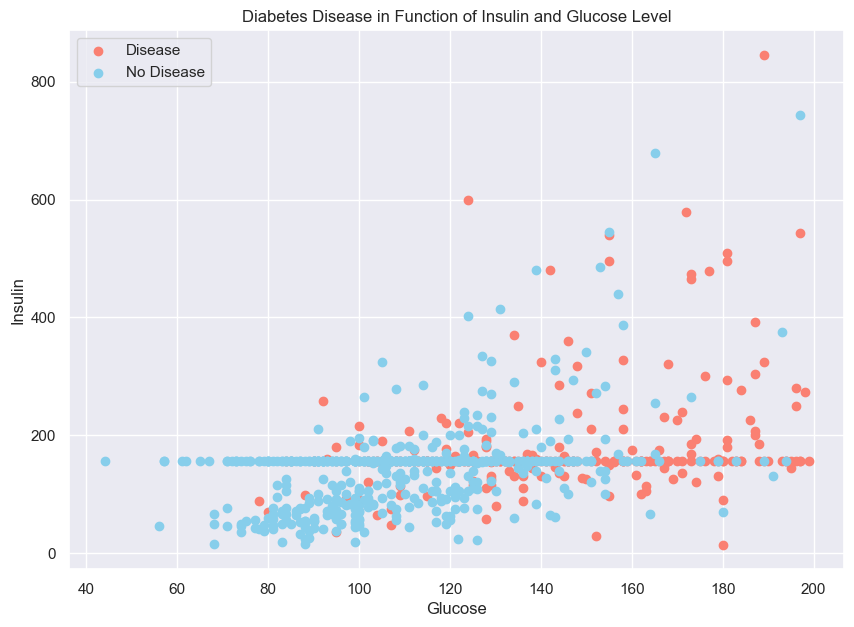

In [32]:
# Create another figure
plt.figure(figsize=(10,7))

# Start with positive examples
plt.scatter(data_copy.glucose[data_copy.diabetes==1],
            data_copy.insulin[data_copy.diabetes==1],
            c = "salmon")

# Some Negative Examples
plt.scatter(data_copy.glucose[data_copy.diabetes == 0],
            data_copy.insulin[data_copy.diabetes == 0],
            c = "skyblue")

# Add some other helpful information
plt.title("Diabetes Disease in Function of Insulin and Glucose Level")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend(["Disease", "No Disease"])

plt.show()

### Spliting data into train and test set

In [23]:
# Load already preprocessed data

data_preprocessed = pd.read_csv("diabetes_preprocessed_without_scalingButBalanced.csv")

In [24]:
data_preprocessed.drop(columns=data_preprocessed.columns[0], axis=1, inplace=True)
data_preprocessed.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [25]:
x, y= divide_data(data_preprocessed)

(1000, 8) (1000,)


In [26]:
# Method to convert pandas to numpy

def convert_to_numpy(X, y):
    X = X.to_numpy()
    y = y.to_numpy()
    
    return X,y

In [27]:
x, y = convert_to_numpy(x, y)

### Splitting  dataset into train and  test  set

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 123, stratify=y) 

In [559]:
#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42) 

In [219]:
xtrain

array([[-0.84488505,  0.1597866 , -0.67752325, ..., -0.41789153,
         0.99399263, -1.04154944],
       [ 0.93691372,  1.88112959,  0.77001375, ...,  0.49592704,
         0.34466711,  1.51108316],
       [-1.14185152, -0.8730192 , -0.47073225, ...,  0.41977549,
        -0.63083122, -0.70119842],
       ...,
       [ 0.04601433, -0.184482  ,  0.14964075, ..., -0.39250768,
        -0.28955781,  1.08564439],
       [ 1.23388019, -0.49745345,  1.59717775, ...,  1.43512945,
        -0.70331407,  1.00055664],
       [ 0.04601433,  0.19108374,  0.97680475, ...,  0.31824009,
         0.38090854, -0.44593516]])

<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Machine Learning Phase </h1>

### Using inbuilt models

In [29]:
# Random Forest

l = []
best_acu = 0
best_pred = 0
best_estimator = 0
for i in range (10, 110):
    rcla = RandomForestClassifier(n_estimators = i)
    rcla.fit(xtrain, ytrain)
    predicted = rcla.predict(xtest)
    acu = accuracy_score(predicted.round(), ytest)
    l.append(acu)
    if best_acu < acu:
        best_acu = acu
        best_pred = predicted
        best_estimator = i

Accuracy using Random Forest is 89.5 %
Best estimator:  22


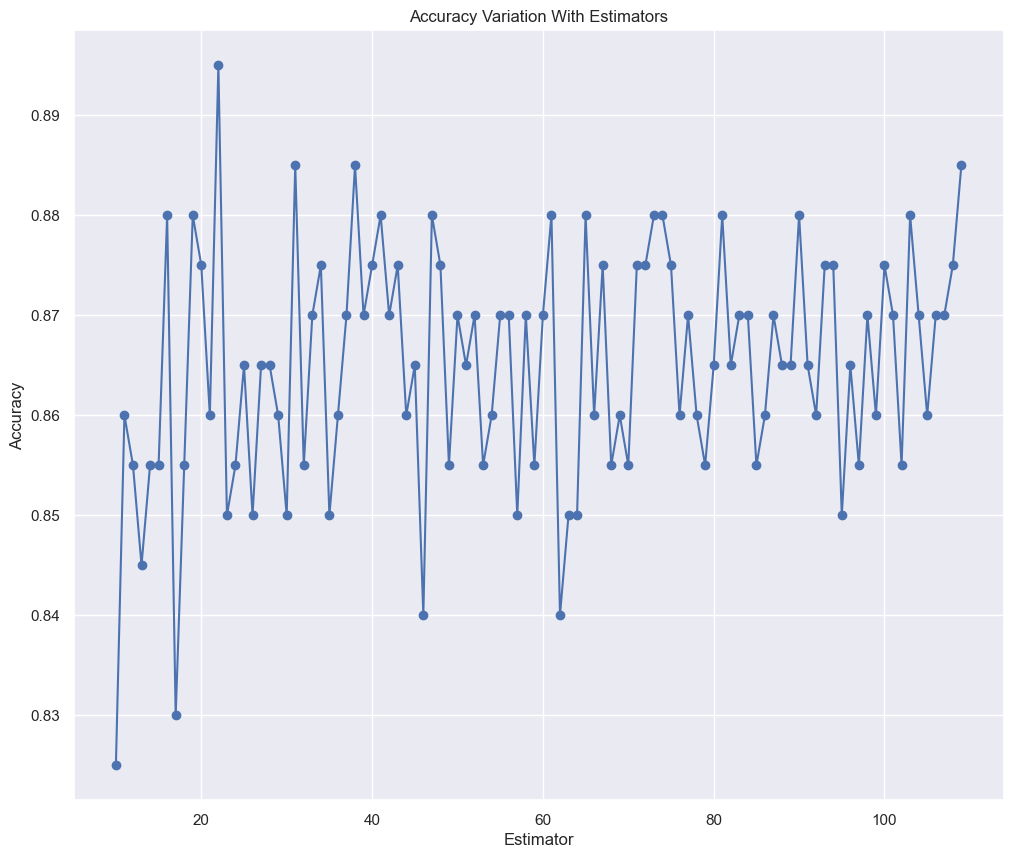

In [30]:
plt.figure(figsize = (12,10))
plt.plot(range (10, 110), l, marker = 'o')
plt.xlabel('Estimator', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy Variation With Estimators', size = 12)
print("Accuracy using Random Forest is {} %".format(best_acu*100))
print("Best estimator: ", best_estimator)

In [77]:
# Saving best random forest model so far


pickle.dump(rcla, open("RandomForestModel3.pkl", "wb"))

AUC value is 0.8953558202382145


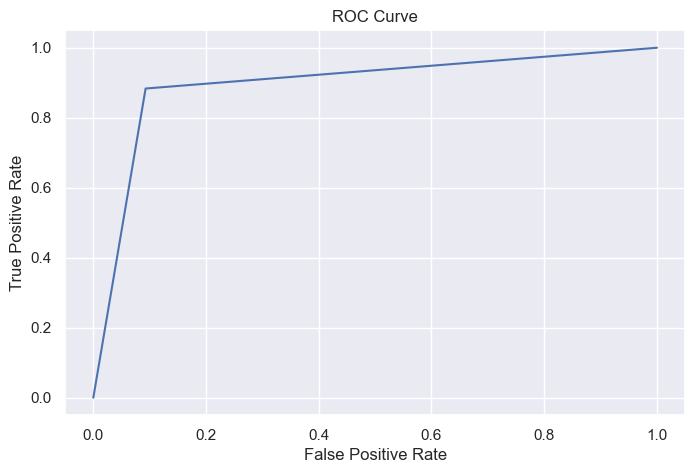

In [31]:
fpr, tpr, threshould = roc_curve(best_pred, ytest)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('ROC Curve', size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

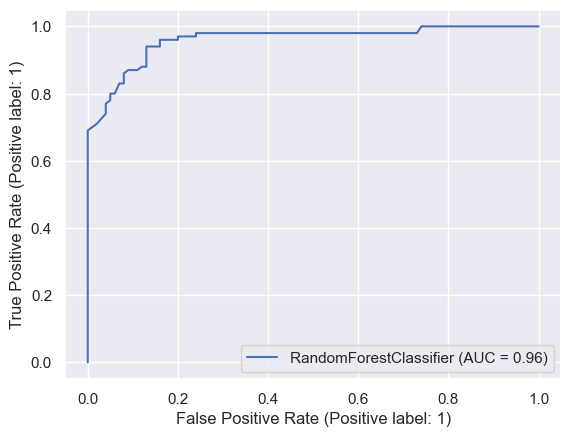

In [79]:
plot_roc_curve(rcla, xtest, ytest)

In [80]:
y_score = rcla.predict_proba(xtest)
print(roc_auc_score(ytest, y_score[:, 1]))

0.9598


In [81]:
# Evaluation Metrics
print(confusion_matrix(ytest, best_pred))
print(classification_report(ytest, best_pred))
print("Accuracy:", accuracy_score(ytest, best_pred))
print("ROC_AUC_SCORE: ", roc_auc_score(ytest, y_score[:, 1]))
print("Precision: ", precision_score(ytest, best_pred))
print("Recall or Sensitivity:",recall_score(ytest, best_pred))
print("MCC: ", matthews_corrcoef(ytest, best_pred))

[[87 13]
 [ 4 96]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       100
           1       0.88      0.96      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200

Accuracy: 0.915
ROC_AUC_SCORE:  0.9598
Precision:  0.8807339449541285
Recall or Sensitivity: 0.96
MCC:  0.8333820599391434


In [ ]:
# Using Saved model
# load the model.
rf_model = pickle.load(open("RandomForestModel.pkl", "rb"))

In [74]:
#rf_model.fit(xtrain, ytrain)

In [ ]:
pred = rf_model.predict(xtest)

In [ ]:
print(accuracy_score(ytest, pred))

<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Naive Bayes Classifier Implementation </h1>

<h2 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Source code for this algorithm is Credited to Leober, (2019) as referenced in this thesis. </h2>

[Source: Patrick Leober (Python Engineer)- Naive Bayes](https://www.youtube.com/watch?v=BqUmKsfSWho)



In [2]:


class NaiveBayes:
    
    # Trainign Phase of the algorithm
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Initializing the values of mean, var and prior for each class
        
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        # Loop to calculate mean, var, and prior for each class
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            
            
    # Testing Phase of the algorithm
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    # Helper method called in the main predict method above 
    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._gpd(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]
    
    
    # Method to calculate the Gaussian probability distibution function
    def _gpd(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
# convert to numpy 
x = x.to_numpy()
y = y.to_numpy()

In [ ]:
y.shape

In [ ]:
x.shape

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 123, stratify=y) 

In [231]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


In [279]:
nb = NaiveBayes()
nb.fit(xtrain, ytrain)
predictions = nb.predict(xtest)

print("Naive Bayes classification accuracy", accuracy(ytest, predictions))

Naive Bayes classification accuracy 0.815


In [233]:
# Saving Naive Bayes Classifier
pickle.dump(nb, open("NaiveBayesModel5.pkl", "wb"))

In [110]:
# Naive Bayes Scores using our evaluation metrics

In [234]:
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))
print("Accuracy:", accuracy_score(ytest, predictions))
print("ROC_AUC_SCORE: ", roc_auc_score(ytest, predictions))
print("Precision: ", precision_score(ytest, predictions))
print("Recall or Sensitivity:",recall_score(ytest, predictions))
print("MCC: ", matthews_corrcoef(ytest, predictions))

[[84 16]
 [21 79]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.83      0.79      0.81       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

Accuracy: 0.815
ROC_AUC_SCORE:  0.8150000000000001
Precision:  0.8315789473684211
Recall or Sensitivity: 0.79
MCC:  0.6307889796454161


<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Decision Tree Algorithm Implementation </h1>

<h2 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Source code for this algorithm is Credited to Leober, (2019) as referenced in this thesis. </h2>

[Source: Patrick Leober (Python Engineer)- SVM](https://www.youtube.com/watch?v=UX0f9BNBcsY)

In [3]:
# Decision Tree Algorithm Implementation
# Source code created by Leober, 2019 as referenced in this thesis.

from collections import Counter
import numpy as np

# Method to calculate the entropy of any node (parent or child)
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

# Node Class represents either parent node, left or right child node or leaf node 
class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


# The main decision Tree class    
class DecisionTree:
    
    # initializing the parameters for the decision tree class
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    # Training phase of the algorithm    
    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)
        
    # Testing phase of the algorithm
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    # Helper method for the training phase used to grow the tree
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    # helper method to find the best split as calculated by the information gain
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                
                # This is where the information gain helper method is called
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    # Helper method to calculate the information gain from values gotten entropy of both parent and child nodes 
    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    # split method that determines if the growth of a tree moves to the right or left child nodes
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    # helper method for the testing phase which is used to traverse the built tree
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
    # helper method that returns the most common labels on the leaf nodes.
    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [290]:
dt = DecisionTree(min_samples_split=2, max_depth=3)
dt.fit(xtrain, ytrain)

predictions = dt.predict(xtest)
acc = accuracy(ytest, predictions)

print("Accuracy:", acc)

Accuracy: 0.74


In [ ]:
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))
print("Accuracy:", accuracy_score(ytest, predictions))
print("ROC_AUC_SCORE: ", roc_auc_score(ytest, predictions))
print("Precision: ", precision_score(ytest, predictions))
print("Recall or Sensitivity:",recall_score(ytest, predictions))
print("MCC: ", matthews_corrcoef(ytest, predictions))

In [291]:
# Saving Decision Tree Model
pickle.dump(dt, open("DecisionTreeModel2.pkl", "wb"))

In [199]:
# Support Vector Machine

In [280]:
# Support vector machine

l = []
best_acu = 0
best_pred = 0
best_reg_param = 0
for i in range (1, 10):
    svm = SVC(kernel='poly', C= i)
    svm.fit(xtrain, ytrain)
    predicted = svm.predict(xtest)
    acu = accuracy_score(predicted.round(), ytest)
    l.append(acu)
    if best_acu < acu:
        best_acu = acu
        best_pred = predicted
        best_reg_param = i

Accuracy using Support Vector Machine is 83.0 %
Best regularization parameter:  6


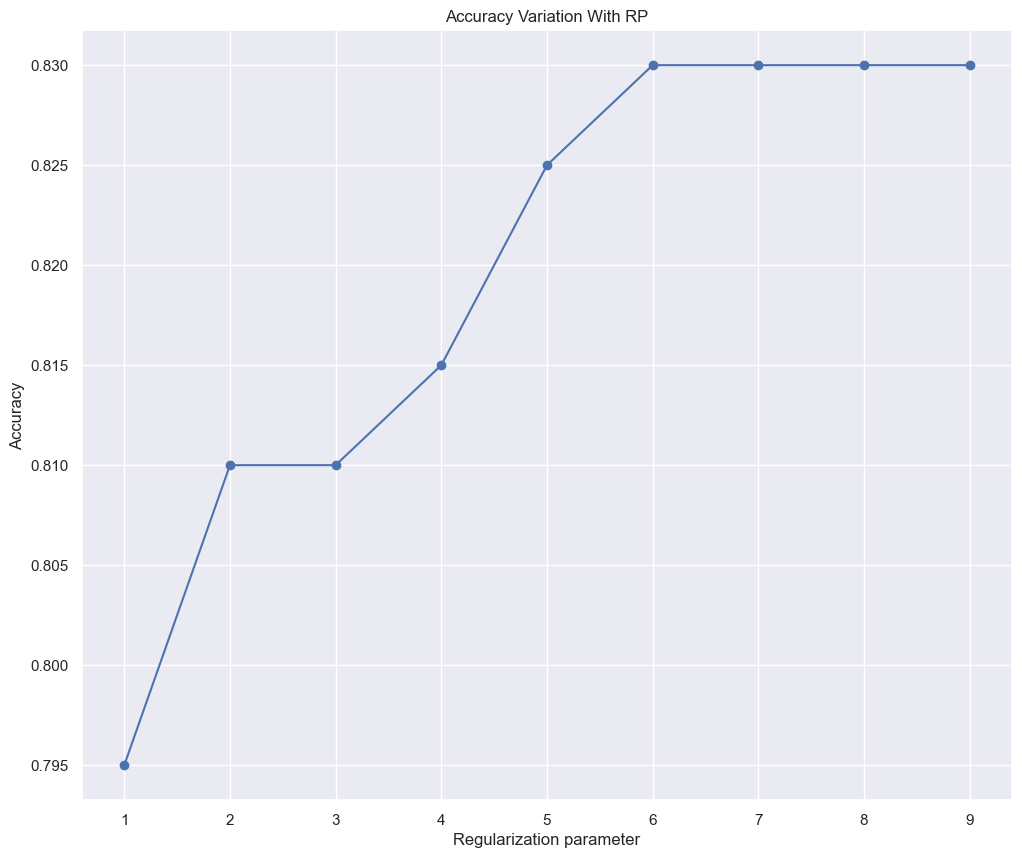

In [281]:
plt.figure(figsize = (12,10))
plt.plot(range (1, 10), l, marker = 'o')
plt.xlabel('Regularization parameter', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy Variation With RP', size = 12)
print("Accuracy using Support Vector Machine is {} %".format(best_acu*100))
print("Best regularization parameter: ", best_reg_param)

In [242]:
# Save SVM model 
pickle.dump(svm, open("SupportVectorMachine3.pkl", "wb"))

AUC value is 0.836


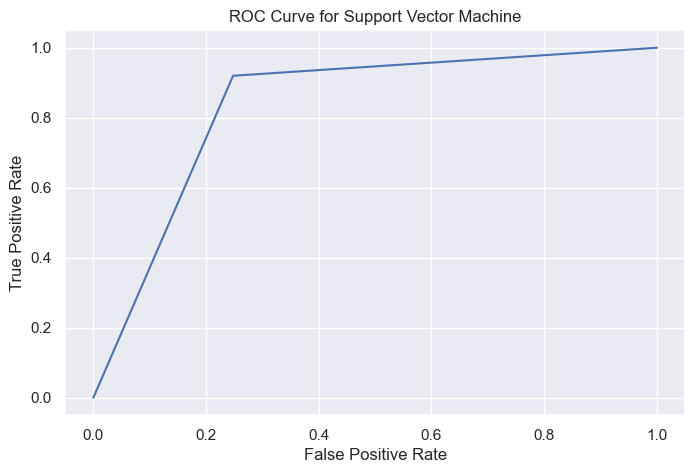

In [190]:
fpr, tpr, threshould = roc_curve(best_pred, ytest)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('ROC Curve for Support Vector Machine', size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

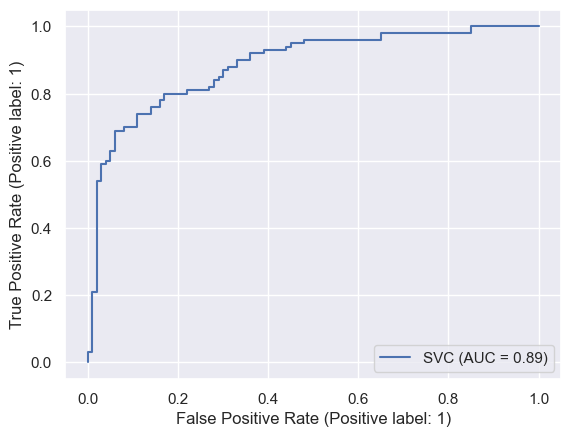

In [191]:
plot_roc_curve(svm, xtest, ytest)

In [192]:
print(confusion_matrix(ytest, best_pred))
print(classification_report(ytest, best_pred))
print("Accuracy:", accuracy_score(ytest, best_pred))
print("ROC_AUC_SCORE: ", roc_auc_score(ytest, best_pred))
print("Precision: ", precision_score(ytest, best_pred))
print("Recall or Sensitivity:",recall_score(ytest, best_pred))
print("MCC: ", matthews_corrcoef(ytest, best_pred))

[[94  6]
 [31 69]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       100
           1       0.92      0.69      0.79       100

    accuracy                           0.81       200
   macro avg       0.84      0.81      0.81       200
weighted avg       0.84      0.81      0.81       200

Accuracy: 0.815
ROC_AUC_SCORE:  0.815
Precision:  0.92
Recall or Sensitivity: 0.69
MCC:  0.6506612021628461


<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Performance Evaluation Phase</h1>



<br>
<h1 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Load Naive Bayes Model</h1>


In [13]:
# Using Saved model
# load the model.
nb_model = pickle.load(open("NaiveBayesModel5.pkl", "rb"))

In [34]:
# Method to read file, process and split dataset into train and test

def read_process_split(file):
    data = pd.read_csv(file)
    
    # drop first column
    data.drop(columns=data.columns[0], axis=1, inplace=True)
    
    # divide features and target
    x = data.iloc[:,: -1]
    y = data.iloc[:, -1]
    
    # convert to numpy
    x = x.to_numpy()
    y = y.to_numpy()
    
    #create train test split
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 123, stratify=y)
    
    return xtrain, xtest, ytrain, ytest;

In [35]:
# Method to read file, process and divide dataset into x and y

def read_process_divide(file):
    data = pd.read_csv(file)
    
    # drop first column
    data.drop(columns=data.columns[0], axis=1, inplace=True)
    
    # divide features and target
    x = data.iloc[:,: -1]
    y = data.iloc[:, -1]
    
    # convert to numpy
    x = x.to_numpy()
    y = y.to_numpy()
    
    #create train test split
    #xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 123, stratify=y)
    
    return x,y;

In [36]:
xtrain, xtest, ytrain, ytest = read_process_split("diabetes_preprocessed_bestNBandSVM.csv")

In [17]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


In [9]:
predictions = nb_model.predict(xtest)

print("Naive Bayes classification accuracy", accuracy(ytest, predictions))

Naive Bayes classification accuracy 0.815


In [245]:
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))
print("Accuracy:", accuracy_score(ytest, predictions))
print("ROC_AUC_SCORE: ", roc_auc_score(ytest, predictions))
print("Precision: ", precision_score(ytest, predictions))
print("Recall or Sensitivity:",recall_score(ytest, predictions))
print("MCC: ", matthews_corrcoef(ytest, predictions))

[[84 16]
 [21 79]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.83      0.79      0.81       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

Accuracy: 0.815
ROC_AUC_SCORE:  0.8150000000000001
Precision:  0.8315789473684211
Recall or Sensitivity: 0.79
MCC:  0.6307889796454161


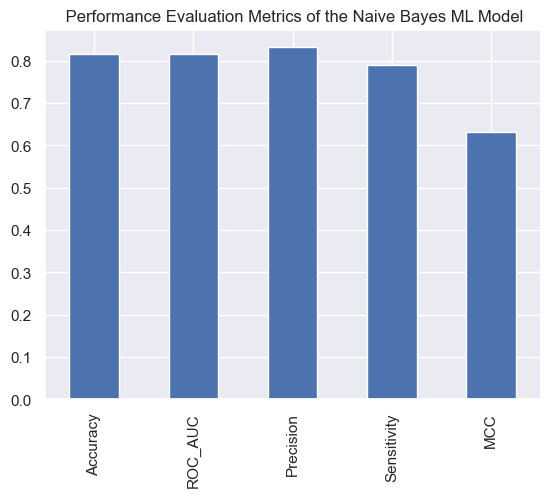

In [246]:
# Visualizing evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : accuracy_score(ytest, predictions),
                           "ROC_AUC":roc_auc_score(ytest, predictions),
                           "Precision":precision_score(ytest, predictions),
                           "Sensitivity": recall_score(ytest, predictions),
                           "MCC": matthews_corrcoef(ytest, predictions)},
                           index=[0])
eva_metrics.T.plot.bar(title =" Performance Evaluation Metrics of the Naive Bayes ML Model", legend=False);

AUC value is 0.8157894736842105


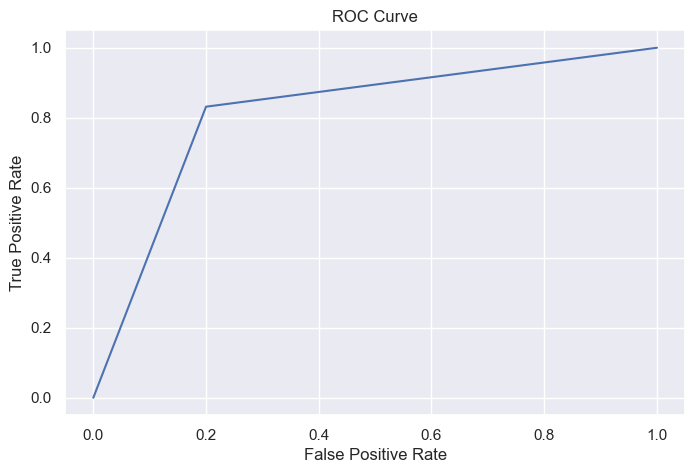

In [247]:
fpr, tpr, threshould = roc_curve(predictions, ytest)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('ROC Curve', size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

<br>
<h2 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Cross Validation for Naive Bayes</h2>


In [18]:
x, y = read_process_divide("diabetes_preprocessed_bestNBandSVM.csv")

In [40]:
steps = [('m', nb_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_nb1 = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores_nb1)
score_nb1 = mean(scores_nb1)
print('Accuracy: %.3f' % score_nb1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_nb2 = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores_nb2)
score_nb2 = mean(scores_nb2)
print('ROC_AUC: %.3f' % score_nb2)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_nb3 = cross_val_score(pipeline, x, y, scoring='recall', cv=cv, n_jobs=-1)
print(scores_nb3)
score_nb3 = mean(scores_nb3)
print('Sensitivity: %.3f' % score_nb3)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_nb4 = cross_val_score(pipeline, x, y, scoring='precision', cv=cv, n_jobs=-1)
print(scores_nb4)
score_nb4 = mean(scores_nb4)
print('Precision: %.3f' % score_nb4)

[0.78 0.69 0.75 0.8  0.76 0.65 0.74 0.75 0.72 0.68 0.68 0.76 0.69 0.72
 0.75 0.8  0.73 0.76 0.71 0.67 0.69 0.79 0.71 0.73 0.7  0.71 0.67 0.69
 0.81 0.74]
Accuracy: 0.728
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
ROC_AUC: nan
[0.66 0.6  0.64 0.8  0.64 0.58 0.68 0.72 0.86 0.7  0.62 0.72 0.66 0.72
 0.68 0.78 0.7  0.66 0.64 0.66 0.62 0.74 0.6  0.6  0.74 0.68 0.68 0.64
 0.84 0.66]
Sensitivity: 0.684
[0.86842105 0.73170732 0.82051282 0.8        0.84210526 0.6744186
 0.77272727 0.76595745 0.671875   0.67307692 0.70454545 0.7826087
 0.70212766 0.72       0.79069767 0.8125     0.74468085 0.825
 0.74418605 0.67346939 0.72093023 0.82222222 0.76923077 0.81081081
 0.68518519 0.72340426 0.66666667 0.71111111 0.79245283 0.78571429]
Precision: 0.754


In [41]:
steps = [('m', GaussianNB())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_nb1 = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores_nb1)
score_nb1 = mean(scores_nb1)
print('Accuracy: %.3f' % score_nb1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_nb2 = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores_nb2)
score_nb2 = mean(scores_nb2)
print('ROC_AUC: %.3f' % score_nb2)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_nb3 = cross_val_score(pipeline, x, y, scoring='recall', cv=cv, n_jobs=-1)
print(scores_nb3)
score_nb3 = mean(scores_nb3)
print('Sensitivity: %.3f' % score_nb3)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_nb4 = cross_val_score(pipeline, x, y, scoring='precision', cv=cv, n_jobs=-1)
print(scores_nb4)
score_nb4 = mean(scores_nb4)
print('Precision: %.3f' % score_nb4)

[0.78 0.69 0.75 0.8  0.76 0.65 0.74 0.75 0.72 0.68 0.68 0.76 0.69 0.72
 0.75 0.8  0.73 0.76 0.71 0.67 0.69 0.79 0.71 0.73 0.7  0.71 0.67 0.69
 0.81 0.74]
Accuracy: 0.728
[0.862  0.7252 0.846  0.8556 0.8824 0.7448 0.8368 0.8168 0.816  0.8036
 0.798  0.8284 0.7576 0.7976 0.8152 0.888  0.8216 0.8616 0.7784 0.7844
 0.7804 0.8448 0.8316 0.8384 0.792  0.8176 0.7748 0.7664 0.8456 0.8484]
ROC_AUC: 0.815
[0.66 0.6  0.64 0.8  0.64 0.58 0.68 0.72 0.86 0.7  0.62 0.72 0.66 0.72
 0.68 0.78 0.7  0.66 0.64 0.66 0.62 0.74 0.6  0.6  0.74 0.68 0.68 0.64
 0.84 0.66]
Sensitivity: 0.684
[0.86842105 0.73170732 0.82051282 0.8        0.84210526 0.6744186
 0.77272727 0.76595745 0.671875   0.67307692 0.70454545 0.7826087
 0.70212766 0.72       0.79069767 0.8125     0.74468085 0.825
 0.74418605 0.67346939 0.72093023 0.82222222 0.76923077 0.81081081
 0.68518519 0.72340426 0.66666667 0.71111111 0.79245283 0.78571429]
Precision: 0.754


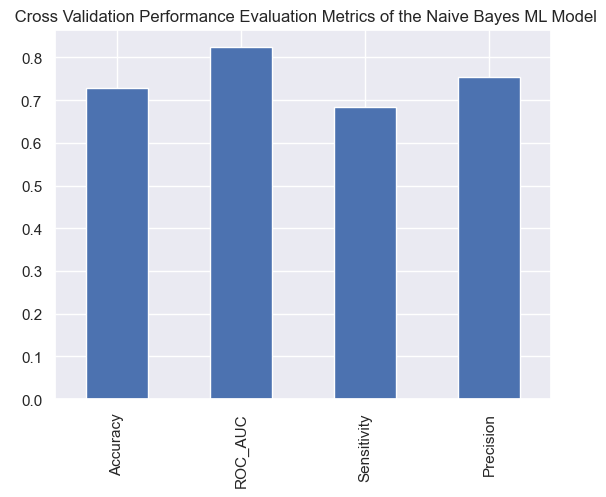

In [25]:
# Visualizing  Cross Validation evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : score_nb1,
                           "ROC_AUC":score_nb2,
                           "Sensitivity": score_nb3,
                           "Precision":score_nb4},
                           index=[0])
eva_metrics.T.plot.bar(title =" Cross Validation Performance Evaluation Metrics of the Naive Bayes ML Model", legend=False);

<br>
<h2 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Load Support Vector Machine Model</h2>

In [37]:
# Using Saved model
# load the model.
svm_model = pickle.load(open("SupportVectorMachine3.pkl", "rb"))

In [15]:
best_pred_svm= svm_model.predict(xtest)

In [16]:
print("Accuracy:", accuracy_score(ytest, best_pred_svm))

Accuracy: 0.83


In [250]:
print(confusion_matrix(ytest, best_pred_svm))
print(classification_report(ytest, best_pred_svm))
print("Accuracy:", accuracy_score(ytest, best_pred_svm))
print("ROC_AUC_SCORE: ", roc_auc_score(ytest, best_pred_svm))
print("Precision: ", precision_score(ytest, best_pred_svm))
print("Recall or Sensitivity:",recall_score(ytest, best_pred_svm))
print("MCC: ", matthews_corrcoef(ytest, best_pred_svm))

[[91  9]
 [25 75]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.89      0.75      0.82       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200

Accuracy: 0.83
ROC_AUC_SCORE:  0.8300000000000001
Precision:  0.8928571428571429
Recall or Sensitivity: 0.75
MCC:  0.6686137412403139


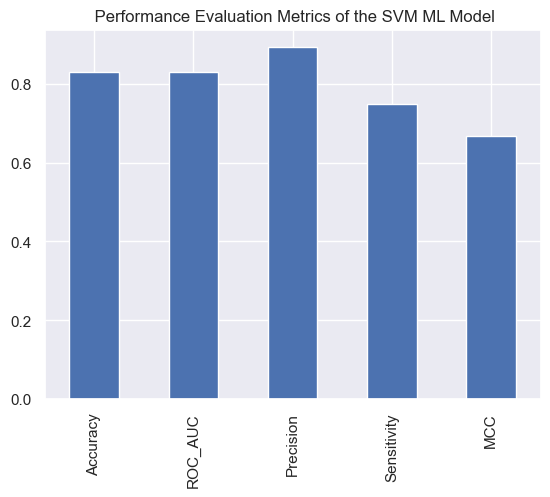

In [251]:
# Visualizing evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : accuracy_score(ytest, best_pred_svm),
                           "ROC_AUC":roc_auc_score(ytest, best_pred_svm),
                           "Precision":precision_score(ytest, best_pred_svm),
                           "Sensitivity": recall_score(ytest, best_pred_svm),
                           "MCC": matthews_corrcoef(ytest, best_pred_svm)},
                           index=[0])
eva_metrics.T.plot.bar(title =" Performance Evaluation Metrics of the SVM ML Model", legend=False);

<br>
<h2 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Cross Validation for Support Vector Machine </h2>


In [38]:
steps = [('m', svm_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_svm1= cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores_svm1)
score_svm1 = mean(scores_svm1)
print('Accuracy: %.3f' % score_svm1)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_svm2 = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores_svm2)
score_svm2 = mean(scores_svm2)
print('ROC_AUC: %.3f' % score_svm2)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_svm3= cross_val_score(pipeline, x, y, scoring='recall', cv=cv, n_jobs=-1)
print(scores_svm3)
score_svm3 = mean(scores_svm3)
print('Sensitivity: %.3f' % score_svm3)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_svm4 = cross_val_score(pipeline, x, y, scoring='precision', cv=cv, n_jobs=-1)
print(scores_svm4)
score_svm4 = mean(scores_svm4)
print('Precision: %.3f' % score_svm4)


[0.74 0.68 0.78 0.81 0.78 0.68 0.75 0.71 0.72 0.66 0.72 0.76 0.66 0.67
 0.74 0.78 0.75 0.77 0.72 0.71 0.67 0.77 0.77 0.7  0.66 0.7  0.74 0.73
 0.74 0.79]
Accuracy: 0.729
[0.8732 0.7588 0.87   0.8316 0.8672 0.7388 0.8192 0.7792 0.8008 0.748
 0.8088 0.8432 0.7448 0.736  0.8016 0.8868 0.82   0.8688 0.776  0.8076
 0.7804 0.8088 0.8768 0.8268 0.722  0.7892 0.7976 0.8036 0.7716 0.8652]
ROC_AUC: 0.807
[0.62 0.58 0.64 0.8  0.68 0.58 0.64 0.7  0.76 0.68 0.64 0.68 0.62 0.72
 0.72 0.76 0.76 0.64 0.64 0.64 0.6  0.78 0.7  0.56 0.62 0.64 0.68 0.62
 0.74 0.72]
Sensitivity: 0.672
[0.81578947 0.725      0.88888889 0.81632653 0.85       0.725
 0.82051282 0.71428571 0.7037037  0.65384615 0.76190476 0.80952381
 0.67391304 0.65454545 0.75       0.79166667 0.74509804 0.86486486
 0.76190476 0.74418605 0.69767442 0.76470588 0.81395349 0.77777778
 0.67391304 0.72727273 0.77272727 0.79487179 0.74       0.8372093 ]
Precision: 0.762


In [39]:
steps = [('m', SVC())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_svm1= cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores_svm1)
score_svm1 = mean(scores_svm1)
print('Accuracy: %.3f' % score_svm1)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_svm2 = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores_svm2)
score_svm2 = mean(scores_svm2)
print('ROC_AUC: %.3f' % score_svm2)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_svm3= cross_val_score(pipeline, x, y, scoring='recall', cv=cv, n_jobs=-1)
print(scores_svm3)
score_svm3 = mean(scores_svm3)
print('Sensitivity: %.3f' % score_svm3)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_svm4 = cross_val_score(pipeline, x, y, scoring='precision', cv=cv, n_jobs=-1)
print(scores_svm4)
score_svm4 = mean(scores_svm4)
print('Precision: %.3f' % score_svm4)


[0.85 0.67 0.79 0.79 0.83 0.74 0.8  0.77 0.81 0.74 0.77 0.83 0.74 0.77
 0.78 0.79 0.82 0.82 0.74 0.76 0.76 0.78 0.79 0.79 0.71 0.76 0.73 0.76
 0.79 0.86]
Accuracy: 0.778
[0.9204 0.7216 0.8988 0.8812 0.898  0.822  0.8452 0.8304 0.882  0.8096
 0.8348 0.8812 0.7544 0.8804 0.852  0.846  0.8764 0.896  0.8416 0.8464
 0.834  0.8776 0.878  0.8596 0.7644 0.844  0.838  0.8356 0.8464 0.9124]
ROC_AUC: 0.850
[0.84 0.72 0.76 0.76 0.86 0.74 0.88 0.76 0.92 0.82 0.74 0.9  0.8  0.86
 0.84 0.8  0.92 0.82 0.72 0.8  0.78 0.82 0.82 0.72 0.74 0.82 0.9  0.78
 0.88 0.86]
Sensitivity: 0.813
[0.85714286 0.65454545 0.80851064 0.80851064 0.81132075 0.74
 0.75862069 0.7755102  0.75409836 0.70689655 0.78723404 0.78947368
 0.71428571 0.72881356 0.75       0.78431373 0.76666667 0.82
 0.75       0.74074074 0.75       0.75925926 0.77358491 0.8372093
 0.69811321 0.73214286 0.67164179 0.75       0.74576271 0.86      ]
Precision: 0.763


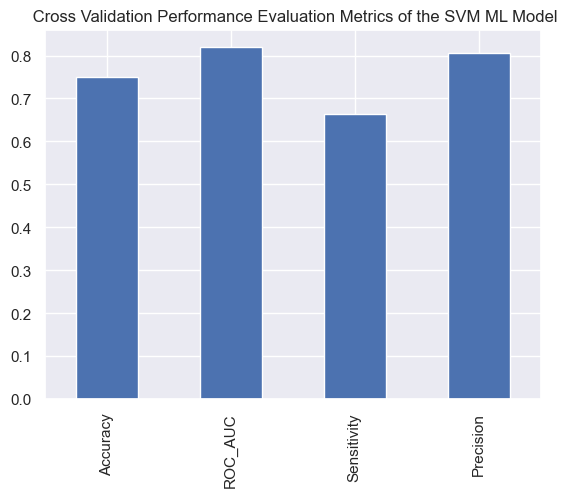

In [19]:
# Visualizing  Cross Validation evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : score_svm1,
                           "ROC_AUC":score_svm2,
                           "Sensitivity": score_svm3,
                           "Precision":score_svm4},
                           index=[0])
eva_metrics.T.plot.bar(title =" Cross Validation Performance Evaluation Metrics of the SVM ML Model", legend=False);


<br>
<h2 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Laod Decision Tree Model</h2>


In [21]:
# Using Saved model
# load the model.
dt_model = pickle.load(open("DecisionTreeModel2.pkl", "rb"))

In [22]:
best_pred_dt = dt_model.predict(xtest)

In [23]:
print("Accuracy:", accuracy_score(ytest, best_pred_dt))

Accuracy: 0.74


In [295]:
# Evaluation Metrics
print(confusion_matrix(ytest, best_pred_dt))
print(classification_report(ytest, best_pred_dt))
print("Accuracy:", accuracy_score(ytest, best_pred_dt))
print("ROC_AUC_SCORE: ", roc_auc_score(ytest, best_pred_dt))
print("Precision: ", precision_score(ytest, best_pred_dt))
print("Recall or Sensitivity:",recall_score(ytest, best_pred_dt))
print("MCC: ", matthews_corrcoef(ytest, best_pred_dt))

[[56 44]
 [ 8 92]]
              precision    recall  f1-score   support

           0       0.88      0.56      0.68       100
           1       0.68      0.92      0.78       100

    accuracy                           0.74       200
   macro avg       0.78      0.74      0.73       200
weighted avg       0.78      0.74      0.73       200

Accuracy: 0.74
ROC_AUC_SCORE:  0.7400000000000001
Precision:  0.6764705882352942
Recall or Sensitivity: 0.92
MCC:  0.5144957554275266


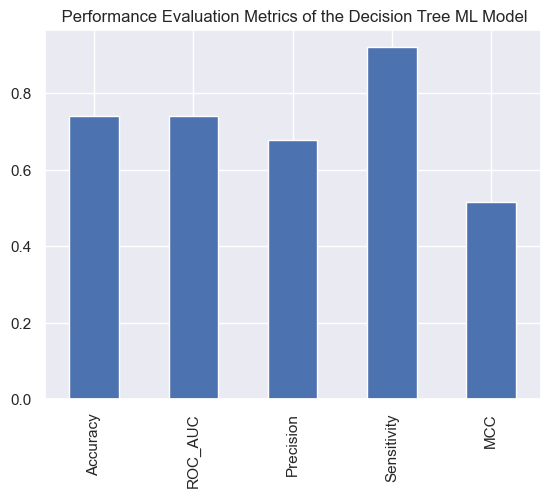

In [296]:
# Visualizing evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : accuracy_score(ytest, best_pred_dt),
                           "ROC_AUC":roc_auc_score(ytest, best_pred_dt),
                           "Precision":precision_score(ytest, best_pred_dt),
                           "Sensitivity": recall_score(ytest, best_pred_dt),
                           "MCC": matthews_corrcoef(ytest, best_pred_dt)},
                           index=[0])
eva_metrics.T.plot.bar(title =" Performance Evaluation Metrics of the Decision Tree ML Model", legend=False);

<br>
<h2 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Cross Validation for Decision Tree </h2>


In [26]:
steps = [('m', dt_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_dt1 = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores_dt1)
score_dt1 = mean(scores_dt1)
print('Accuracy: %.3f' % score_dt1)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_dt2 = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores_dt2)
score_dt2 = mean(scores_dt2)
print('ROC_AUC: %.3f' % score_dt2)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_dt3 = cross_val_score(pipeline, x, y, scoring='recall', cv=cv, n_jobs=-1)
print(scores_dt3)
score_dt3 = mean(scores_dt3)
print('Sensitivity: %.3f' % score_dt3)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_dt4 = cross_val_score(pipeline, x, y, scoring='precision', cv=cv, n_jobs=-1)
print(scores_dt4)
score_dt4 = mean(scores_dt4)
print('Precision: %.3f' % score_dt4)


[0.7  0.68 0.79 0.73 0.74 0.76 0.69 0.72 0.73 0.76 0.74 0.71 0.67 0.73
 0.75 0.75 0.71 0.8  0.69 0.72 0.73 0.73 0.78 0.78 0.71 0.74 0.7  0.71
 0.74 0.77]
Accuracy: 0.732
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
ROC_AUC: nan
[0.74 0.58 0.78 0.9  0.86 0.92 0.86 0.86 0.86 0.92 0.82 0.94 0.76 0.9
 0.82 0.92 0.88 0.88 0.78 0.78 0.84 0.78 0.86 0.84 0.86 0.88 0.94 0.78
 0.82 0.86]
Sensitivity: 0.841
[0.68518519 0.725      0.79591837 0.67164179 0.69354839 0.6969697
 0.64179104 0.671875   0.68253968 0.6969697  0.70689655 0.64383562
 0.6440678  0.67164179 0.71929825 0.68656716 0.65671642 0.75862069
 0.66101695 0.69642857 0.68852459 0.70909091 0.74137931 0.75
 0.66153846 0.6875     0.63513514 0.68421053 0.70689655 0.72881356]
Precision: 0.693


In [27]:
steps = [('m', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_dt1 = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores_dt1)
score_dt1 = mean(scores_dt1)
print('Accuracy: %.3f' % score_dt1)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_dt2 = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores_dt2)
score_dt2 = mean(scores_dt2)
print('ROC_AUC: %.3f' % score_dt2)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_dt3 = cross_val_score(pipeline, x, y, scoring='recall', cv=cv, n_jobs=-1)
print(scores_dt3)
score_dt3 = mean(scores_dt3)
print('Sensitivity: %.3f' % score_dt3)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_dt4 = cross_val_score(pipeline, x, y, scoring='precision', cv=cv, n_jobs=-1)
print(scores_dt4)
score_dt4 = mean(scores_dt4)
print('Precision: %.3f' % score_dt4)


[0.91 0.78 0.87 0.86 0.8  0.87 0.82 0.85 0.84 0.84 0.89 0.87 0.78 0.8
 0.91 0.85 0.81 0.84 0.86 0.84 0.84 0.84 0.89 0.86 0.8  0.83 0.78 0.84
 0.8  0.84]
Accuracy: 0.840
[0.9  0.74 0.86 0.86 0.75 0.88 0.79 0.83 0.85 0.86 0.87 0.87 0.78 0.81
 0.87 0.86 0.79 0.84 0.87 0.83 0.84 0.83 0.89 0.87 0.81 0.82 0.76 0.83
 0.83 0.85]
ROC_AUC: 0.835
[0.9  0.82 0.86 0.94 0.88 0.94 0.9  0.88 0.92 0.92 0.92 0.92 0.9  0.86
 0.92 0.84 0.9  0.82 0.88 0.9  0.94 0.94 0.94 0.94 0.9  0.9  0.88 0.92
 0.9  0.84]
Sensitivity: 0.897
[0.88235294 0.70689655 0.84       0.79661017 0.73076923 0.79661017
 0.76666667 0.83018868 0.81818182 0.8245614  0.86792453 0.83928571
 0.72580645 0.75438596 0.78947368 0.84615385 0.74137931 0.85714286
 0.88       0.80357143 0.79310345 0.79310345 0.88888889 0.78333333
 0.77966102 0.78571429 0.74576271 0.8        0.78947368 0.84313725]
Precision: 0.803


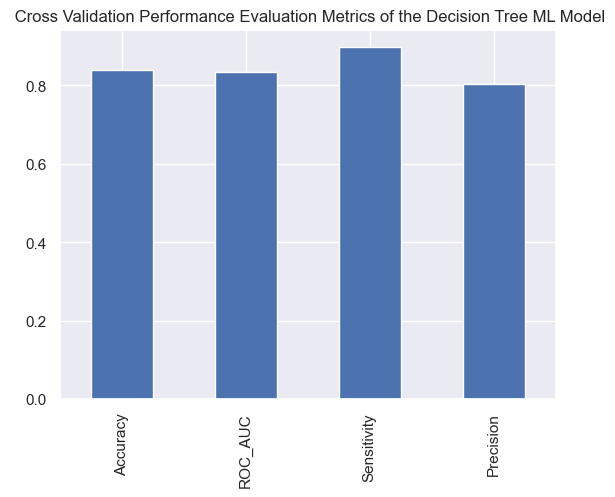

In [28]:
# Visualizing  Cross Validation evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : score_dt1,
                           "ROC_AUC":score_dt2,
                           "Sensitivity": score_dt3,
                           "Precision":score_dt4},
                           index=[0])
eva_metrics.T.plot.bar(title =" Cross Validation Performance Evaluation Metrics of the Decision Tree ML Model", legend=False);

<br>
<h2 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Laod Random Forest Model</h2>


In [32]:
#data = pd.read_csv("diabetes_preprocessed_withScalingAndBalance.csv")

In [33]:
#data.drop(columns=data.columns[0], axis=1, inplace=True)

In [35]:
#x, y=divide_data(data)

(1000, 8) (1000,)


In [37]:
#x,  y= convert_to_numpy(x , y)

In [38]:
#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 123, stratify=y) 

In [29]:
x, y = read_process_divide("diabetes_preprocessed_withScalingAndBalance.csv")

In [30]:
xtrain, xtest, ytrain, ytest = read_process_split("diabetes_preprocessed_withScalingAndBalance.csv")

In [31]:
# Using Saved model
# load the model.
rf_model = pickle.load(open("RandomForestModel1.pkl", "rb"))

In [52]:
best_pred_rf = rf_model.predict(xtest)

In [53]:
y_score = rf_model.predict_proba(xtest)
print(roc_auc_score(ytest, y_score[:, 1]))

0.9709


In [43]:
# Evaluation Metrics test
print(confusion_matrix(ytest, best_pred_rf))
print(classification_report(ytest, best_pred_rf))
print("Accuracy:", accuracy_score(ytest, best_pred_rf))
print("ROC_AUC_SCORE: ", roc_auc_score(ytest, y_score[:, 1]))
print("Precision: ", precision_score(ytest, best_pred_rf))
print("Recall or Sensitivity:",recall_score(ytest, best_pred_rf))
print("MCC: ", matthews_corrcoef(ytest, best_pred_rf))

[[84 16]
 [ 5 95]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       100
           1       0.86      0.95      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200

Accuracy: 0.895
ROC_AUC_SCORE:  0.9709
Precision:  0.8558558558558559
Recall or Sensitivity: 0.95
MCC:  0.7948233159981003


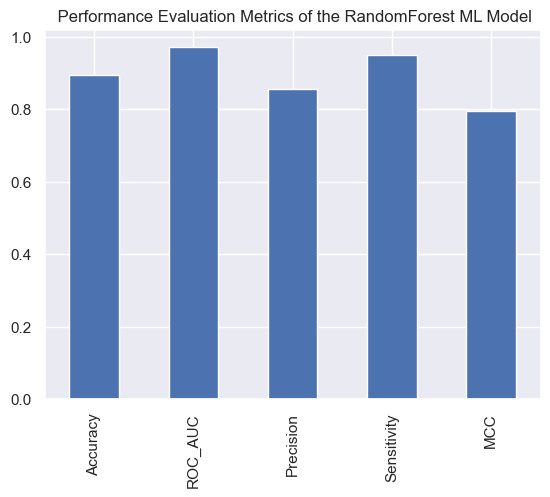

In [44]:
# Visualizing evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : accuracy_score(ytest, best_pred_rf),
                           "ROC_AUC":roc_auc_score(ytest, y_score[:, 1]),
                           "Precision":precision_score(ytest, best_pred_rf),
                           "Sensitivity": recall_score(ytest, best_pred_rf),
                           "MCC": matthews_corrcoef(ytest, best_pred_rf)},
                           index=[0])
eva_metrics.T.plot.bar(title =" Performance Evaluation Metrics of the RandomForest ML Model", legend=False);

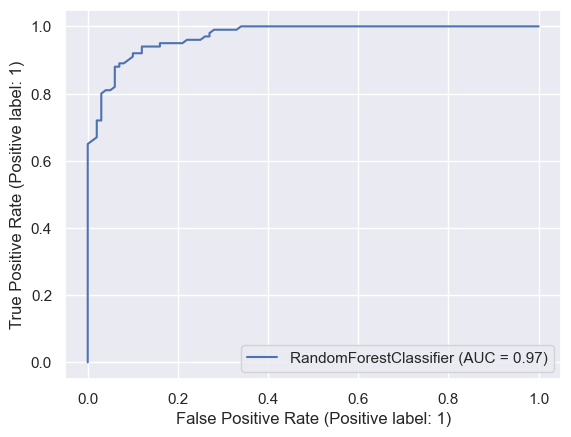

In [45]:
plot_roc_curve(rf_model, xtest, ytest)

Text(67.25, 0.5, 'Predicted labels')

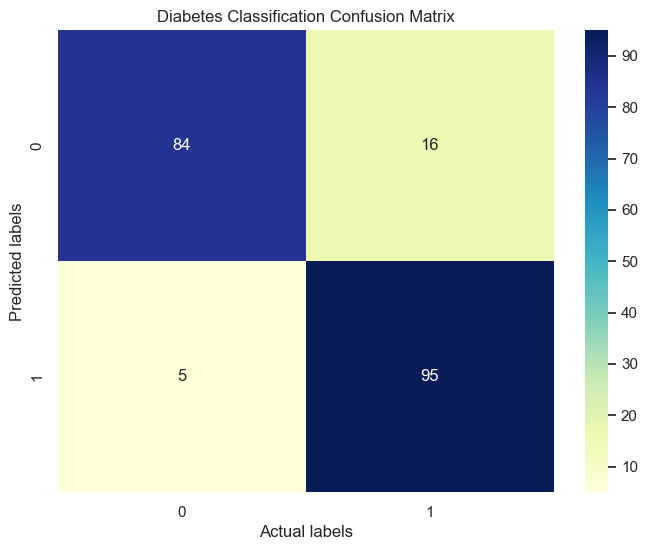

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_matrix(ytest, best_pred_rf), cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Diabetes Classification Confusion Matrix')

plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")

<br>
<h2 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #A52A2A ; color : white ; text-align: center; border-radius: 50px 50px;"> Cross Validation for Random Forest </h2>


In [59]:
steps = [('m', rf_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores)
score = mean(scores)
print('ROC_AUC: %.3f' % score)


[0.9714 0.873  0.9676 0.9478 0.9468 0.9172 0.9326 0.9352 0.9222 0.9502
 0.974  0.9738 0.8938 0.9444 0.954  0.96   0.9346 0.9692 0.9144 0.9498
 0.9314 0.9792 0.9676 0.956  0.9196 0.928  0.9178 0.9314 0.9268 0.9574]
ROC_AUC: 0.942


In [60]:
steps = [('m', rf_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
score = mean(scores)
print('Accuracy: %.3f' % score)


[0.9  0.78 0.88 0.88 0.85 0.85 0.84 0.88 0.79 0.84 0.91 0.89 0.78 0.87
 0.88 0.87 0.81 0.88 0.83 0.85 0.86 0.88 0.86 0.88 0.82 0.88 0.79 0.86
 0.82 0.86]
Accuracy: 0.852


In [61]:
steps = [('m', rf_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='recall', cv=cv, n_jobs=-1)
print(scores)
score = mean(scores)
print('Recall: %.3f' % score)


[0.9  0.9  0.9  0.96 0.92 0.88 0.92 0.9  0.92 0.98 0.96 0.94 0.9  0.96
 0.94 0.98 0.9  0.92 0.88 0.88 0.9  1.   0.92 0.92 0.9  0.88 0.94 0.86
 0.9  0.86]
Recall: 0.917


In [62]:
steps = [('m', rf_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='precision', cv=cv, n_jobs=-1)
print(scores)
score = mean(scores)
print('Precision: %.3f' % score)


[0.88235294 0.6984127  0.95744681 0.81034483 0.85714286 0.81481481
 0.79661017 0.91836735 0.77586207 0.77777778 0.85714286 0.83928571
 0.71875    0.83928571 0.83928571 0.82758621 0.76271186 0.88461538
 0.83018868 0.8490566  0.81818182 0.80645161 0.83333333 0.83636364
 0.78947368 0.84615385 0.74603175 0.7962963  0.76271186 0.84      ]
Precision: 0.820


In [32]:
steps = [('m', rf_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores1)
score1 = mean(scores1)
print('Accuracy: %.3f' % score1)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores2)
score2 = mean(scores2)
print('ROC_AUC: %.3f' % score2)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores3 = cross_val_score(pipeline, x, y, scoring='recall', cv=cv, n_jobs=-1)
print(scores3)
score3 = mean(scores3)
print('Recall: %.3f' % score3)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores4 = cross_val_score(pipeline, x, y, scoring='precision', cv=cv, n_jobs=-1)
print(scores4)
score4 = mean(scores4)
print('Precision: %.3f' % score4)


[0.88 0.75 0.9  0.87 0.85 0.85 0.84 0.89 0.83 0.83 0.88 0.88 0.76 0.86
 0.86 0.87 0.81 0.91 0.86 0.83 0.84 0.88 0.87 0.88 0.84 0.88 0.79 0.85
 0.82 0.87]
Accuracy: 0.851
[0.9822 0.8818 0.9634 0.9446 0.9546 0.9216 0.9262 0.9282 0.919  0.9528
 0.9704 0.977  0.8944 0.9384 0.9514 0.9618 0.9366 0.9652 0.9216 0.9492
 0.933  0.9708 0.9642 0.9498 0.9146 0.9268 0.9382 0.931  0.9402 0.9598]
ROC_AUC: 0.942
[0.92 0.88 0.88 0.94 0.88 0.86 0.92 0.9  0.9  0.98 0.94 0.94 0.9  0.96
 0.94 0.96 0.92 0.96 0.88 0.88 0.9  1.   0.92 0.92 0.9  0.88 0.96 0.88
 0.88 0.9 ]
Recall: 0.916
[0.8490566  0.73333333 0.93617021 0.83928571 0.85714286 0.81132075
 0.79310345 0.88235294 0.75409836 0.77777778 0.85454545 0.8245614
 0.70769231 0.81355932 0.83636364 0.84210526 0.77586207 0.87272727
 0.83018868 0.83333333 0.8490566  0.80645161 0.83636364 0.85185185
 0.80701754 0.89795918 0.765625   0.84615385 0.77586207 0.86538462]
Precision: 0.824


In [33]:
steps = [('m', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores1)
score1 = mean(scores1)
print('Accuracy: %.3f' % score1)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores2)
score2 = mean(scores2)
print('ROC_AUC: %.3f' % score2)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores3 = cross_val_score(pipeline, x, y, scoring='recall', cv=cv, n_jobs=-1)
print(scores3)
score3 = mean(scores3)
print('Recall: %.3f' % score3)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores4 = cross_val_score(pipeline, x, y, scoring='precision', cv=cv, n_jobs=-1)
print(scores4)
score4 = mean(scores4)
print('Precision: %.3f' % score4)


[0.86 0.78 0.91 0.88 0.89 0.84 0.85 0.88 0.8  0.83 0.91 0.89 0.78 0.89
 0.88 0.89 0.81 0.89 0.86 0.86 0.86 0.88 0.85 0.89 0.86 0.89 0.87 0.82
 0.81 0.89]
Accuracy: 0.860
[0.9686 0.8912 0.9714 0.9556 0.9472 0.9242 0.9342 0.9336 0.9206 0.947
 0.977  0.977  0.881  0.9418 0.9458 0.9558 0.935  0.9698 0.9232 0.9548
 0.9284 0.9742 0.9694 0.9572 0.9192 0.9256 0.9374 0.9398 0.9364 0.9588]
ROC_AUC: 0.943
[0.88 0.9  0.88 0.94 0.88 0.84 0.9  0.9  0.92 0.98 0.92 0.94 0.9  0.96
 0.92 0.96 0.9  0.94 0.88 0.9  0.9  1.   0.88 0.92 0.92 0.88 0.94 0.84
 0.88 0.88]
Recall: 0.909
[0.9        0.74576271 0.93478261 0.83928571 0.84615385 0.82692308
 0.78947368 0.9        0.75       0.76190476 0.84210526 0.85454545
 0.72580645 0.8245614  0.85185185 0.84210526 0.77966102 0.88461538
 0.8627451  0.7962963  0.83333333 0.80645161 0.85185185 0.85185185
 0.81818182 0.8627451  0.75       0.81481481 0.78571429 0.86792453]
Precision: 0.827


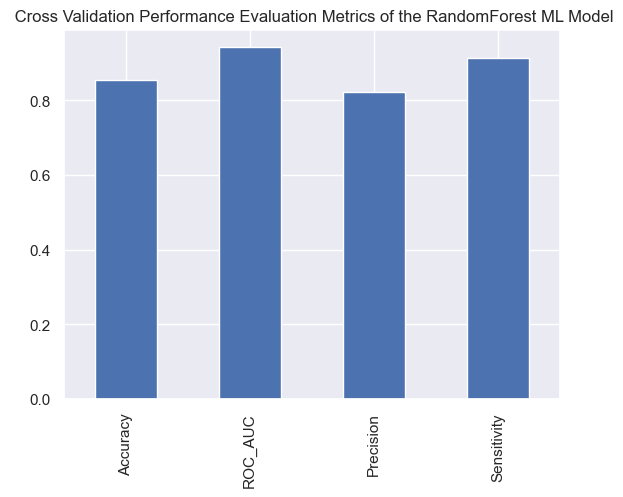

In [64]:
# Visualizing  Cross Validation evaluation metrics

eva_metrics = pd.DataFrame({"Accuracy" : score1,
                           "ROC_AUC":score2,
                           "Precision":score4,
                           "Sensitivity": score3},
                           index=[0])
eva_metrics.T.plot.bar(title =" Cross Validation Performance Evaluation Metrics of the RandomForest ML Model", legend=False);